# Sentimental classification of news headlines

### Importing required libraries

In [63]:
#Importing all required libraries
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import datetime
import re 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#nltk.download('vader_lexicon')

### Data reading

In [64]:
#reading our csv file containing news headlines
df=pd.read_csv(r"india-news-headlines.csv.zip",encoding="ISO-8859-1",parse_dates=['publish_date'])
df.drop('headline_category', inplace=True, axis=1)
df

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [65]:
print("Enter dates between which you wish to analyse the data in YYYY-MM-DD format")
datestart=input("Enter starting date: ")
startdate=datetime.datetime.strptime(datestart,"%Y-%m-%d")
dateend=input("Enter ending date: ")
enddate=datetime.datetime.strptime(dateend,"%Y-%m-%d")

Enter dates between which you wish to analyse the data in YYYY-MM-DD format
Enter starting date: 2019-01-01
Enter ending date: 2019-12-31


In [66]:
#Filtering the data of csv file
df.drop(df.index[(df['publish_date']<startdate)|(df['publish_date']>enddate)],axis=0,inplace=True)
df=df.set_index('publish_date')
df

,headline_text
publish_date,
2019-01-01,are you guilty of making these fashion faux pas
2019-01-01,Happy New Year 2020: How to get rid of a hango...
2019-01-01,Happy New Year Card Ideas 2020: Checkout these...
2019-01-01,happy new year 2019 images cards gifs pictures...
2019-01-01,Building teams with thumping African music
...,...
2019-12-31,No relief from cold; two killed in road accide...
2019-12-31,Hyderabad man dies at EDM fest; third death in...
2019-12-31,A trip to a tribal village with super cop Vija...


### Data cleaning and pre-processing

In [67]:
#creating new column to store cleaned data
df["new_headline"]=df["headline_text"]

In [68]:
#converting all data to lower case
df['new_headline']=df['new_headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [69]:
#removing all special characters
df['new_headline']=df['new_headline'].str.replace('[^\w\s]','',regex=True)

In [70]:
#removing stopwords
stop=stopwords.words('english')
df["new_headline"]=df["new_headline"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [71]:
#removing numeric digits
def removenum(text):
    result=re.sub(r'\d+', '', text)
    return result

df['new_headline']=df['new_headline'].apply(removenum)

In [72]:
#lemmatization of data
lemmatizer=WordNetLemmatizer()

def lemm(text):
    word_list=nltk.word_tokenize(text)
    lemm_output=' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemm_output

df['new_headline']=df['new_headline'].apply(lemm, convert_dtype=True, args=())

In [73]:
df

,headline_text,new_headline
publish_date,,
2019-01-01,are you guilty of making these fashion faux pas,guilty making fashion faux pa
2019-01-01,Happy New Year 2020: How to get rid of a hango...,happy new year get rid hangover new year party
2019-01-01,Happy New Year Card Ideas 2020: Checkout these...,happy new year card idea checkout outstanding ...
2019-01-01,happy new year 2019 images cards gifs pictures...,happy new year image card gifs picture quote w...
2019-01-01,Building teams with thumping African music,building team thumping african music
...,...,...
2019-12-31,No relief from cold; two killed in road accide...,relief cold two killed road accident due fog f...
2019-12-31,Hyderabad man dies at EDM fest; third death in...,hyderabad man dy edm fest third death three day
2019-12-31,A trip to a tribal village with super cop Vija...,trip tribal village super cop vijayan memorable


### Sentiment analysis

In [74]:
#calculating polarity score
senti=SentimentIntensityAnalyzer()
def getscore(review):
    cs=senti.polarity_scores(review)['compound']
    return cs

In [75]:
#new column to store polarity score
df['score']=df['new_headline'].apply(getscore)

In [76]:
#finding the sentiment attached to the score
def getsentiment(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negative'
    else:
        return 'Neutral'

In [77]:
#new column to store the sentiment(positive/negative/neutral)
df['sentiment']=df['score'].apply(getsentiment)

In [78]:
df

,headline_text,new_headline,score,sentiment
publish_date,,,,
2019-01-01,are you guilty of making these fashion faux pas,guilty making fashion faux pa,-0.4215,Negative
2019-01-01,Happy New Year 2020: How to get rid of a hango...,happy new year get rid hangover new year party,0.7506,Positive
2019-01-01,Happy New Year Card Ideas 2020: Checkout these...,happy new year card idea checkout outstanding ...,0.8834,Positive
2019-01-01,happy new year 2019 images cards gifs pictures...,happy new year image card gifs picture quote w...,0.8402,Positive
2019-01-01,Building teams with thumping African music,building team thumping african music,0.0000,Neutral
...,...,...,...,...
2019-12-31,No relief from cold; two killed in road accide...,relief cold two killed road accident due fog f...,-0.6705,Negative
2019-12-31,Hyderabad man dies at EDM fest; third death in...,hyderabad man dy edm fest third death three day,-0.5994,Negative
2019-12-31,A trip to a tribal village with super cop Vija...,trip tribal village super cop vijayan memorable,0.5994,Positive


In [79]:
#counting total number of positive,negative or neutral data
tb_counts = df['sentiment'].value_counts()
tb_counts

Neutral     78682
Negative    61672
Positive    41790
Name: sentiment, dtype: int64

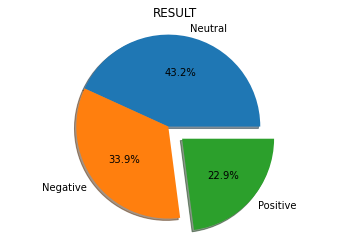

In [80]:
#plotting a pie-chart showing percentage of positive,negative or neutral data 
%matplotlib inline
explode=(0,0,0.2)
plt.pie(tb_counts.values, labels=tb_counts.index,explode=explode,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('RESULT')
plt.show()

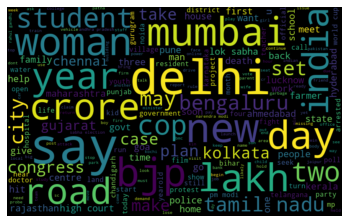

In [81]:
#plotting our Wordcloud
allWords=' '.join( [text for text in df['new_headline']])
wordCloud=WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [82]:
#viewing headlines as per your sentimental preference
n=int(input("Enter\n1. View all positive headlines\n2. View all negative headlines\n3. View all neutral headlines\n4. None\n"))
print()

if n==1:
    j=1
    for i in range(0,df.shape[0]):
        if(df['sentiment'][i]=='Positive'):
            print(str(j) + '. '+df['headline_text'][i])
            print()
            j=j+1
elif n==2:
    j=1
    for i in range(0,df.shape[0]):
        if(df['sentiment'][i]=='Negative'):
            print(str(j) + '. '+df['headline_text'][i])
            print()
            j=j+1
elif n==3:
    j=1
    for i in range(0,df.shape[0]):
        if(df['sentiment'][i]=='Neutral'):
            print(str(j) + '. '+df['headline_text'][i])
            print()
            j=j+1
else:
    print("Okay")

Enter
1. View all positive headlines
2. View all negative headlines
3. View all neutral headlines
4. None
1

1. Happy New Year 2020: How to get rid of a hangover after new year party

2. Happy New Year Card Ideas 2020: Checkout these outstanding New Year greeting cards

3. happy new year 2019 images cards gifs pictures quotes wishes messages status photos wallpapers greetings cards

4. Sushant Divgikar: 2018 was definitely a win for the LGBTQI community on TV

5. Rohitashv Gour: Who says comedy actors are not stars?

6. Bengaluru students share their goals for 2019

7. Bengaluru students share their goals for 2019

8. I wish we had more movies like Raazi: Kanwaljit Singh

9. What we want to see in 2019 in the Kannada film industry

10. I wish we had more movies like Raazi: Kanwaljit Singh

11. For 2019: Work on the past to have a better future relationship

12. taking the reins in 2019 professional women polo players earn the right to be treated with respect and not just courtesy

13. 

2421. Pak reciters spread message of peace

2422. Defence corridor inaugurated; Tamil Nadu to get Rs 3;100 crore investment

2423. Collegians showcase their best

2424. Collegians showcase their best

2425. Kannada audiences are truly appreciative of good music

2426. Ankita Lokhande: If the script is good I will definitely work with Sushant Singh Rajput

2427. Our future lies in community supported farming

2428. Our future lies in community supported farming

2429. Ankita Lokhande: I am not the kind of face that gets lost in the crowd. I own the character I play

2430. Making offbeat cinema is like cycling against the wind: Seenu Ramasamy

2431. I'm not interested in taking up monotonous roles: Sanjana Singh

2432. The powerful women from Manikarnika's army

2433. TV actor Gautam Rode enjoyed a qawwali performance in Lucknow

2434. TV actor Gautam Rode enjoyed a qawwali performance in Lucknow

2435. TV actor Gautam Rode enjoyed a qawwali performance in Lucknow

2436. Chancellor honou

4421. Metro to adopt rainwater harvesting in viaduct; stations

4422. Tourism sector welcomes proposal to run double-decker buses

4423. Nine scribes bestowed Arvindbabu journalism awards

4424. Old friend gives a sweet deal to BJP MLA's constituency

4425. WhatsApp love sours in 6 months

4426. Jeweller robbed of 1.2 kg gold worth Rs 35L near Patan

4427. When waste is best and one man's trash is another's cash

4428. 'People's budget' prepared behind closed doors

4429. AgriGold: Telangana HC paves way for relief

4430. Dall mills want removal of GST from branded pulses

4431. Pvt sector too must encourage Farmer Producer Organizations

4432. New and improved green pathway in Mt Mary area

4433. Plan to use chemicals to restore Gateway's sheen

4434. Karnataka budget: Big boost for agriculture; Rs 12;650 crore for loan waiver

4435. After temple run; HDK makes generous allocations for mutts

4436. Plan cell to protect public land

4437. Prantij MLA's win to go to trial

4438. High co

7087. Fresh bids called for Orchid Pharma

7088. Mondaikad festival begins

7089. Hakimpet Air Force Station awarded Colours by President

7090. 'Kalagram'; Rs 11-crore cultural space inspired by Dilli Haat; planned near P L Deshpande garden

7091. 'Save Water' should be a people's movement in Gujarat: PM Narendra Modi

7092. Cinema of Resistance promotes multiculturalism

7093. 'Surmayee Sham' churns out Marathi; Hindi hit numbers

7094. Helen O' Grady drama fest entertains

7095. Streamline rules to boost supply of homes

7096. Ahmedabad gets high on devotion on Mahashivaratri

7097. Railways clear Rs922 cr Nag-Nagbhid project

7098. Street Smart: Wall posts turning heads in Lodhi Colony

7099. Extra checks: Man slaps customs officer

7100. CM HD Kumaraswamy to gift new sugar factory to Mandya

7101. Filmmaker Nagdeve wins director's award at Dalit film fest in New York

7102. Govt brings in ordinance to help MSMEs start projects without approvals

7103. Star rating may play spoilspo

9420. Civic body organizes special camps for collection of tax

9421. JMC to buy new cleaning vehicles worth Rs 30cr after polls

9422. India lift men's title' Portugal win women's title

9423. Hits of Madan Mohan and RD enthral audience

9424. Rashtriya Shala revives Gandhiji's ghani in Rajkot

9425. Beed couple donates organs of their son to save four lives

9426. No relief in SC for Bezonbagh bldgs

9427. Watchmen warn parties of using 'chowkidar' prefix

9428. best power bill set to drop by 3 from april 1 msedcl to rise by 6

9429. Food delivery firm roped in to promote voting in Bhilwara

9430. MVD told to amend rules to keep kids safe

9431. Punjab triumph in National Para Powerlifting Championship; Sudhir; Sakina emerge strongest

9432. RR vs KXIP; IPL 2019: Kings XI Punjab beat Rajasthan Royals by 14 runs; Ashwin sparks controversy

9433. Folk performances wow audience at school event

9434. Parents support Presidency University hostel curfew hours

9435. Wall Street poster boy

11477. Free computer classes for needy

11478. Comic play to be staged today

11479. ceo pulls plug on capitals grand foundation day celebration plans

11480. Development has still not reached the shores of Puri

11481. Naveen Patnaik says mothers can bring real 'double engine' growth

11482. Seizures during poll code: Ludhiana; Khanna in top 5 police districts

11483. Noted freedom fighter and ex-MP Paripoornanand Painuli dies at 94

11484. Another jolt for AAP; as state spokesperson joins Cong

11485. Youth take to clean 'poll-dirty' beaches

11486. Congress; BJP emerge as main contenders for Lohardaga seat

11487. UP transport commissioner pays surprise visit to roadways bus stations

11488. MDDA's street smart parking faces resident's ire

11489. CM Trivendra Singh Rawat to woo NRIs to invest in Uttarakhand

11490. Chief justice of Jharkhand HC recommended as SC judge

11491. Delhi-based party to fight in 3 LS seats

11492. Special trains to clear poll rush

11493. Goa: Ramesh Tawa

13888. Election promises coming out of drain

13889. plz help

13890. Hit by demonetisation; Rewari sees hope in government jobs; new projects

13891. Hit by demonetisation; Rewari sees hope in government jobs; new projects

13892. Rahul's business partner got defence deals under UPA: BJP

13893. MC evasive; no space for children to play

13894. Police bust rave party at Tamil Nadu resort; arrest 163

13895. Lok Sabha elections: Campaigning ends in Lucknow with promises & prasad

13896. At Gurugram rally; Rahul Gandhi promises ease of business

13897. Shia cleric Jawad extends support to Rajnath Singh

13898. 'No God; no caste; no religion': Haryana revokes certificate to man a week after it was issued

13899. Stop groundwater misuse; experts urge all parties

13900. When the Lucknow Metro ran in fits & starts

13901. Mumbai: Eco-lamps at MTHL site to protect flamingos; fish

13902. 'Daabangg 3': This picture of Salman Khan and Sudeep is sure to brighten up your Sunday morning

13903. 

15871. Andhra Pradesh: Chandrababu Naidu seeks village deity's blessings; Jaganmohan Reddy with family on counting eve

15872. Andhra Pradesh: Security beefed up at Chandrababu Naidu; Jaganmohan Reddy homes as result stands hours away

15873. BJP orders sweets; Congress waits for victory signs

15874. Stephen's clarifies church to be part of Christian students' selection only

15875. Residents want Bharat Van to be recognised as forest area

15876. UG review: Delhi University invites alumni from home; abroad

15877. Whoever wins; it's business time for vendors

15878. Prodded by NGO; civic body to restore 150-year-old tree

15879. Yamuna cleaner this April than it was previous year; finds study

15880. Does BMC not want experts appointed to tree authority?

15881. AIADMK exudes confidence; hopes to get 2 cabinet berths

15882. Priest who helped gang snatch chains from devotees held

15883. 45 centres; 17;000 officials and one big number game

15884. Secure seat today by 3pm or it'll be


18081. Raipurians come out to play gully cricket; Zumba and hula hoop

18082. Spa days not just for adults; NCR kids are also soaking in the fun with organic; chemical-free spa birthday parties

18083. Girish Karnad played key role in changing Bhopal's theatre scenario: Ashok Vajpayee

18084. A Bharatnatyam performance dedicated to Krishna in Lucknow

18085. Vijay Sethupathi's next is based on a true incident

18086. I took up I Love You to work with Upendra

18087. Murali to host new show Super Dampathi

18088. A Bharatnatyam performance dedicated to Krishna in Lucknow

18089. Vijay Sethupathi; Santhanam join telly stars for a star nite

18090. Kamaleswar; Padmanabha join hands for a political play

18091. They're challenging status quo as they find their way to success

18092. They're challenging status quo as they find their way to success

18093. They're challenging status quo as they find their way to success

18094. Micro review: 'Medical Medium Celery Juice: The Most Powerful M


20419. HC seeks details of N Chandrababu Naidu's security from Andhra Pradesh government

20420. MBBS fees: Kerala government favouring private colleges; alleges opposition

20421. BMTC conductors not accepting last year's passes: Students

20422. Clean up Musi river: Congress MP to Centre

20423. Mount Abu to promote beer cans instead of bottles

20424. Game for exercise: Students develop virtual reality car for a healthy back

20425. Kamal Nath meets Nitin Gadkari; seeks support for highway projects

20426. Friend slashes disabled man's throat in Muli town

20427. Diamond supply to Mumbai disrupted

20428. CGPA conversion puts Telangana and Andhra Pradesh students' DU dreams in disarray

20429. No parking zone on WHC Road? You must be kidding

20430. City police relaxes norm for welfare fund; releases Rs 89.77 lakh

20431. Lok Sabha polls were notfree & fair: Congress leaders

20432. Telangana transport minister seeks printers to clear smart card backlog

20433. Telangana HC orders 


22708. 1;400 taxis operate with GoaMiles; drivers happy: Goa transport minister

22709. Karnataka: Speaker sets Tuesday 6 pm deadline for trust vote

22710. Builders cannot pay EMIs on behalf of buyers: NHB

22711. Outgoing migration beats incoming: Census report

22712. Goa: Increase in stray dogs could prompt ecological imbalance

22713. Haryana: A sapling selfie that's worth Rs 100 a year

22714. Palam Vihar seeks clarity on community centre probe

22715. In a first in Rajasthan; court asks cops to book man for giving dowry

22716. Gujarat HC fines Ahmed Patel Rs 5;000

22717. greater noida village tense as facebook post triggers caste row

22718. Photo: Taimur Ali Khan and Inaaya Naumi Kemmu enjoy their day at the farm

22719. Mumbai: 86 saved from terrace of burning high-rise

22720. Mumbai: 86 saved from terrace of burning high-rise

22721. Naravane next vice-chief of Army; may succeed Rawat

22722. 86 people saved in Mumbai's biggest-ever fire rescue operations

22723. LS clear

25002. Experts stress on better management of flood lines

25003. Dwarka residents revive third waterbody in 4 years

25004. Gujaratis paid the most for tobacco love

25005. Lady luck wins Kharar man Rs 1.5 crore jackpot

25006. Got emotional on seeing first coal rake entering my unit: Shaw

25007. Wanted: Better advance warning system

25008. Rajasthan government to add more water bodies to boost fisheries

25009. Gambler falls into dry well to evade chasing cops; dies

25010. BJP tarnishing Jawaharlal Nehru's image only for political gains: Uttam Kumar

25011. Keep security group out of YMCA; Madras HC tells cops

25012. Newer; bigger and better: 40 more e-buses set to run on Kolkata roads; ease pollution load

25013. Tirupur girl wins best child actress award at US film fest

25014. Denizens come together to save 70-year-old litchi tree

25015. Train and bus tickets sold out ahead of festivities

25016. Invite to TTDP chief to join us: BJP netas

25017. Graffitis crop up as Jaipur r

27588. SIT probe will prove that Chinmayanand is innocent; says ex-Union minister's lawyer

27589. Minor's dad says Chinmayanand's school authorities forged document to mislead court

27590. Governor Anandiben Patel asks affiliated colleges to adopt a village each at Rohilkhand University convocation

27591. Bihar will not adopt model APMC Act of Centre: CM Nitish Kumar

27592. Sushil Kumar Modi draws flak from friends; foes for slump remarks

27593. Kutch varsity's chemistry department to help dates farmers earn more

27594. KSTA on a misson to revive 650 schools

27595. Union government's healthcare scheme helps barely 40% beneficiaries in Pune

27596. Retired colonel fires in air to save guard from assailants in Pune

27597. NCC revives flight training; over 250 cadets to take wing this year

27598. Flood alert again in Maharashtra coastal districts; rivers may rise

27599. INSO joins hands with ABVP in Panjab University; its rival NSUI in DAV

27600. GSLDC staffer; wife booked for 

29866. Footpath Safer

29867. Maradu: Chief secretary apologises to SC; warns of eco impact

29868. Vineet Kothari appointed acting Chief Justice of Madras high court

29869. FMCG firms may pass on tax gains to consumers

29870. Lucky escape for a dozen as part of South Bombay house collapses

29871. Kochi students loud and clear on climate change

29872. 'Change is coming whether you like it or not'; Greta Thunberg's bold message to the leaders

29873. Love story redux: Tamil Nadu's pet parents are inking their feelings

29874. amitabh bachchan and millennial kartik aaryan join forces for a brand endorsement read deets

29875. 'Change is coming whether you like it or not'; Greta Thunberg's bold message to the leaders

29876. Punjab launches next phase of job fair

29877. IIT Ropar and Punjab Infotech join hands to foster entrepreneurship

29878. Andhra Pradesh: Ongole ashram the model for chief minister's elderly care plans

29879. World Wrestling Championships: Bajrang Punia; Ravi Da

32417. FC Goa clear licensing criteria

32418. Meritorious Goan films to be part of special section this year

32419. Companies struggle to pay Diwali bonus; approach banks

32420. Mobile app to make science fun for girls in Delhi government schools

32421. Railway workers learn how to save passengers from derailed train

32422. New tourist hotspot: Adventure park at Naini Lake by year-end

32423. No new registration of credit cooperative societies in Rajasthan

32424. Reward for info on aides of Papla

32425. New MV Act: Huge spurt in suspension of licences in Jaipur

32426. Proof of how Yamuna can still be saved

32427. China lights firms bet big on Kolkata festive season

32428. Hills garden stalemate ends; workers to receive 20% bonus

32429. Karisma & Sunny Deol let off in 22-year-old Rajasthan 'train' case

32430. Don't miss these pictures of Sonam Kapoor from her vacation at 'magical Maldives' with Anand Ahuja

32431. Not just fun; Puja is serious biz worth Rs 15;000cr

32432. P


33920. Chennai safe for women and kids; shows NCRB data

33921. Vehicle Number Plater

33922. Tamil Nadu: Sweets yes; but sugar is not the flavour this festive season

33923. Chennai: Facelift for airport taxiways will help handle big planes

33924. Coke India bottler's profit rises 373%

33925. Bengaluru: Auto driver braves rain; travels 12km to return iPhone to passenger

33926. India open to pacts with governments to comfort funds: Piyush Goyal

33927. Haryana assembly elections: Landmark poll irrespective of result

33928. Haryana assembly elections: Landmark poll irrespective of result

33929. Amazon; Flipkart assured to comply with laws

33930. What's in a name? Key to your riches

33931. Smart city project on ITI road leaves citizens high and dry

33932. How 'Nobel' Abhijit Banerjee inspired an Ahmedabad professor

33933. India moves up 14 spots to 63 on World Bank's ease of doing business

33934. Dombivli youth's life-size humanoid robot wins hearts

33935. Rain alert for Mumb

35864. Rs 1;255 crore toll on NH daylight robbery: PIL

35865. Devotees irked as TTD hikes tariffs of some guest houses at Tirumala

35866. Tamil Nadu's green energy obligation fixed at 21%

35867. 'Now; a level playing field': Experts laud government's English medium move

35868. SCR seminar on healthy eating

35869. bbmp chief clears rs 2k cr road drain works without tenders

35870. Gujarat government to promote multi-disciplinary courses

35871. Bigamy charges: Gaurav Dahiya says he has clean chit from Delhi police

35872. Bengalureans breathe in cleaner air on rainy days

35873. Millat urges Muslims to maintain peace ahead of Milad-un-Nabi

35874. On Ayodhya verdict eve; extra force; eye on posts

35875. On Ayodhya verdict eve; Delhi a fortress

35876. Keep restraint; accept court decision peacefully: Imams

35877. DGCA conducts surprise check at Delhi airport

35878. The spirit of Hyderabad's favourite cricket & style icon lives on

35879. Bigg Boss Tamil 3 fame Meera Mithun enjoy

38416. I got to act in the film just by chance: Lucknowite Yash Raaj Singh

38417. 'Hyderabad's Nirbhaya unwittingly taught us some lessons we can't afford to forget'

38418. 'Hyderabad's Nirbhaya unwittingly taught us some lessons we can't afford to forget'

38419. When Tessy; Manasi and Aditi came together for an inspiring talk

38420. When Tessy; Manasi and Aditi came together for an inspiring talk

38421. Everyone welcomes; but not many go for HIV test before marriage

38422. Wish I could return to school; says veteran lyricist Gulzar in Dehradun

38423. punjab govt issues order to universities not to take late fee fine from kashmiri students ukhand govt mulling over issue

38424. Bihar: Cash; jewellery worth Rs 17 lakh recovered from pickpocket's flat

38425. Patna: Fresh water samples sent for test

38426. Bihar: Trucks moving to JP Setu create traffic jam on roads

38427. Citizenship Bill to help the persecuted: BL Santhosh

38428. Bigg Boss 13: After receiving least votes; Para

40749. Campaign launched to calm public

40750. Better days ahead for Sangli farmers as state grants aid of Rs 109 crore

40751. Secunderabad: Passenger slips; saved by RPF officer

40752. Free katte samu classes begin

40753. Ready for duty: 127 new officers in blue now set to protect India's skies

40754. Jaipur blasts: Kin of victims want all the four convicts to hang without delay

40755. 66th Yamaha Fascino Filmfare Awards South: Yash lifts Best Actor trophy for 'KGF'

40756. 66th Yamaha Fascino Filmfare Awards South: Manvitha Kamath wins the Best Actor Award (Female) for 'Tagaru'

40757. 66th Yamaha Fascino Filmfare Awards South: Keerthy Suresh is the Best Actress for Mahanati

40758. 66th Yamaha Fascino Filmfare Awards South: Mahanati bags the Best Film; Best Actress and the Best Director

40759. 66th Yamaha Fascino Filmfare Awards South: Complete winners' list (Malayalam)

40760. 66th Yamaha Fascino Filmfare Awards South: Full List of Winners in Telugu Cinema

40761. 66th Yamah